# EN3160 Assignment 03: Neural Networks

- Name: A.A.W.L.R.Amarasinghe
- Index No.: 210031H

# Question 1

# Original Code

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.9638
Epoch 2/10, Loss: 1.8480
Epoch 3/10, Loss: 1.8163
Epoch 4/10, Loss: 1.7986
Epoch 5/10, Loss: 1.7867
Epoch 6/10, Loss: 1.7778
Epoch 7/10, Loss: 1.7710
Epoch 8/10, Loss: 1.7655
Epoch 9/10, Loss: 1.7610
Epoch 10/10, Loss: 1.7572


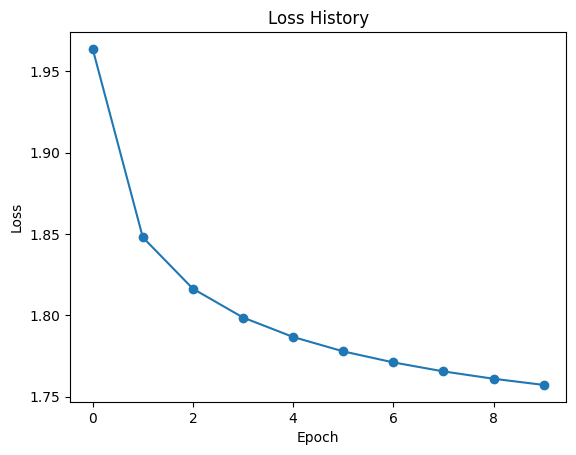

Training accuracy: 40.95%
Test accuracy: 40.10%


In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # 1. Dataloading
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    batch_size = 50
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # Model parameters
    Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
    K = 10  # Output size (number of classes in CIFAR-10)
    std = 1e-5

    # Initialize weights and biases with gradient tracking
    w = nn.Parameter(torch.randn(Din, K) * std)  # One layer: directly map input to output
    b = nn.Parameter(torch.zeros(K))

    # Hyperparameters
    iterations = 10
    lr = 1e-3  # Increased learning rate
    lr_decay = 0.9  # Learning rate decay
    reg = 0  # Regularization
    loss_history = []

    # 3. Training Loop
    for t in range(iterations):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # Get inputs and labels
            inputs, labels = data
            Ntr = inputs.shape[0]  # Batch size
            x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
            
            # Forward pass
            y_pred = x_train.mm(w) + b  # Output layer activation
            
            # Loss calculation (Cross-Entropy Loss with regularization)
            loss = nn.CrossEntropyLoss()(y_pred, labels) + reg * torch.sum(w ** 2)
            running_loss += loss.item()
            
            # Backpropagation
            loss.backward()
            with torch.no_grad():
                # Parameter update
                w -= lr * w.grad
                b -= lr * b.grad
                # Zero gradients after each update
                w.grad.zero_()
                b.grad.zero_()

        # Print loss for every epoch
        avg_epoch_loss = running_loss / len(trainloader)
        loss_history.append(avg_epoch_loss)
        print(f"Epoch {t + 1}/{iterations}, Loss: {avg_epoch_loss:.4f}")

        # Learning rate decay
        lr *= lr_decay

    # 4. Plotting the Loss History
    plt.plot(loss_history, marker='o')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # 5. Calculate Accuracy on Training Set
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for data in trainloader:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)
            y_train_pred = x_train.mm(w) + b
            predicted_train = torch.argmax(y_train_pred, dim=1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    print(f"Training accuracy: {train_acc:.2f}%")

    # 6. Calculate Accuracy on Test Set
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            Nte = inputs.shape[0]
            x_test = inputs.view(Nte, -1)
            y_test_pred = x_test.mm(w) + b
            predicted_test = torch.argmax(y_test_pred, dim=1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()

    test_acc = 100 * correct_test / total_test
    print(f"Test accuracy: {test_acc:.2f}%")


# Adding a middle layer with 100 nodes and a sigmoid activation.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.0840
Epoch 2/10, Loss: 1.9108
Epoch 3/10, Loss: 1.8473
Epoch 4/10, Loss: 1.8088
Epoch 5/10, Loss: 1.7806
Epoch 6/10, Loss: 1.7586
Epoch 7/10, Loss: 1.7410
Epoch 8/10, Loss: 1.7259
Epoch 9/10, Loss: 1.7126
Epoch 10/10, Loss: 1.7008


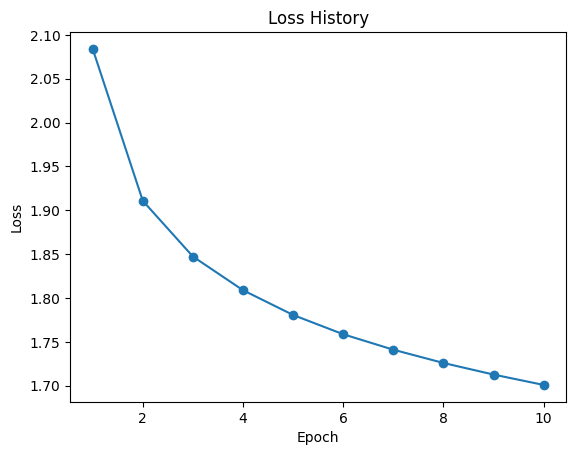

Training Accuracy: 41.53%
Test Accuracy: 40.97%


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # 1. Dataloading
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    batch_size = 50
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 2. Define Network Architecture with Hidden Layer
    class SimpleNet(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(SimpleNet, self).__init__()
            # Define layers
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.sigmoid = nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, output_size)
        
        def forward(self, x):
            x = x.view(x.size(0), -1)  # Flatten input
            x = self.fc1(x)  # First layer
            x = self.sigmoid(x)  # Sigmoid activation
            x = self.fc2(x)  # Output layer
            return x

    # Model parameters
    input_size = 3 * 32 * 32  # CIFAR-10 image size (flattened)
    hidden_size = 100  # Hidden layer size
    output_size = 10  # Number of classes

    # Instantiate model, loss function, and optimizer
    model = SimpleNet(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005)  # Weight decay for L2 regularization

    # 3. Training Loop
    num_epochs = 10
    loss_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Accumulate loss
            running_loss += loss.item()

        # Average loss for the epoch
        epoch_loss = running_loss / len(trainloader)
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # 4. Plotting the Loss History
    plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # 5. Calculate Training Accuracy
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    train_acc = 100 * correct_train / total_train
    print(f"Training Accuracy: {train_acc:.2f}%")
    
    # 6. Calculate Test Accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_acc:.2f}%")


# Question 2

# LeNet-5 network for MNIST

Epoch 1/10: Loss: 0.4048
Epoch 2/10: Loss: 0.0807
Epoch 3/10: Loss: 0.0572
Epoch 4/10: Loss: 0.0426
Epoch 5/10: Loss: 0.0341
Epoch 6/10: Loss: 0.0272
Epoch 7/10: Loss: 0.0238
Epoch 8/10: Loss: 0.0192
Epoch 9/10: Loss: 0.0162
Epoch 10/10: Loss: 0.0153
Training Accuracy: 99.49 %
Test Accuracy : 98.95%


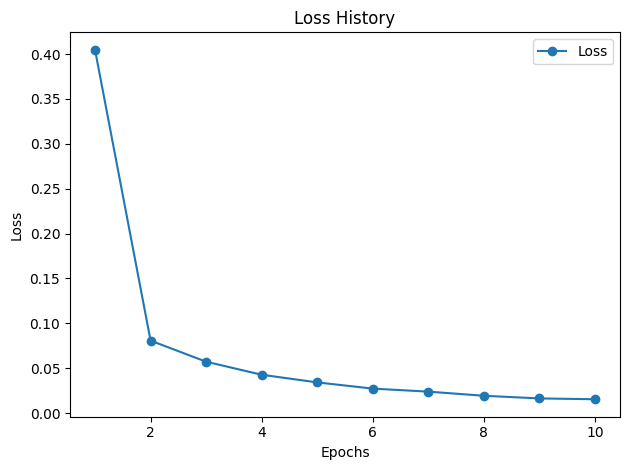

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)     # Input channels: 1, Output channels: 6
        self.pool = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)    # Input channels: 6, Output channels: 16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)           # Adjust input features based on image size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)                    # 10 classes for MNIST

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))        # Layer 1
        x = self.pool(torch.relu(self.conv2(x)))        # Layer 2
        x = x.view(-1, 16 * 5 * 5)                      # Flatten
        x = torch.relu(self.fc1(x))                     # Layer 3
        x = torch.relu(self.fc2(x))                     # Layer 4
        x = self.fc3(x)                                 # Output layer
        return x

# Transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),                        # LeNet-5 expects 32x32 images
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))          # Normalize with MNIST mean and std
])

# Load MNIST Dataset
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize Model, Loss Function, Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training Loop
train_accuracies = []
train_losses = []
for epoch in range(1, 11):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch {epoch}/{iterations}: Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.2f} %')

# Testing Loop
test_accuracies = []
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_accuracy = 100 * correct / total
test_accuracies.append(test_accuracy)
print(f'Test Accuracy : {test_accuracy:.2f}%')

# Plot accuracy and loss with epochs
epochs = list(range(1, 11))

# Plot Training Loss
plt.plot(epochs, train_losses, label='Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()

plt.tight_layout()
plt.show()
